In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from pandas_datareader import data as pdr
import yfinance as yf



In [4]:
start_date = '2012-01-01'
end_date = '2023-12-01'
df = yf.download('TSLA', start=start_date, end=end_date)

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-24,233.750000,238.750000,232.330002,235.449997,235.449997,65125200
2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800
2023-11-28,236.679993,247.000000,234.009995,246.720001,246.720001,148549900
2023-11-29,249.210007,252.750000,242.759995,244.139999,244.139999,135401300
2023-11-30,245.139999,245.220001,236.910004,240.080002,240.080002,132353200


In [6]:
df = df.reset_index()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
1,2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2,2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
3,2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
4,2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


In [8]:
df = df.drop(["Date", "Adj Close"], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1.929333,1.966667,1.843333,1.872000,13921500
1,1.880667,1.911333,1.833333,1.847333,9451500
2,1.850667,1.862000,1.790000,1.808000,15082500
3,1.813333,1.852667,1.760667,1.794000,14794500
4,1.800000,1.832667,1.741333,1.816667,13455000


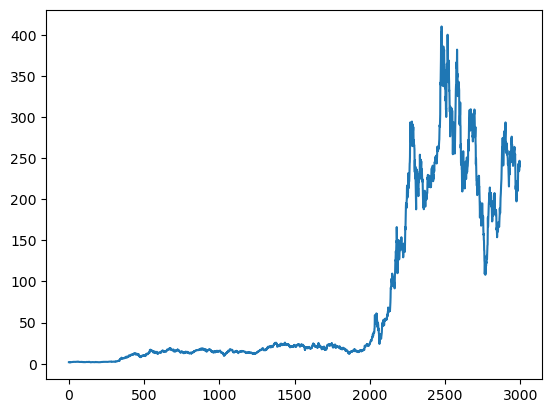

In [9]:
plt.plot(df.Close)

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2993    246.8343
2994    246.4297
2995    246.1526
2996    245.8979
2997    245.6008
Name: Close, Length: 2998, dtype: float64

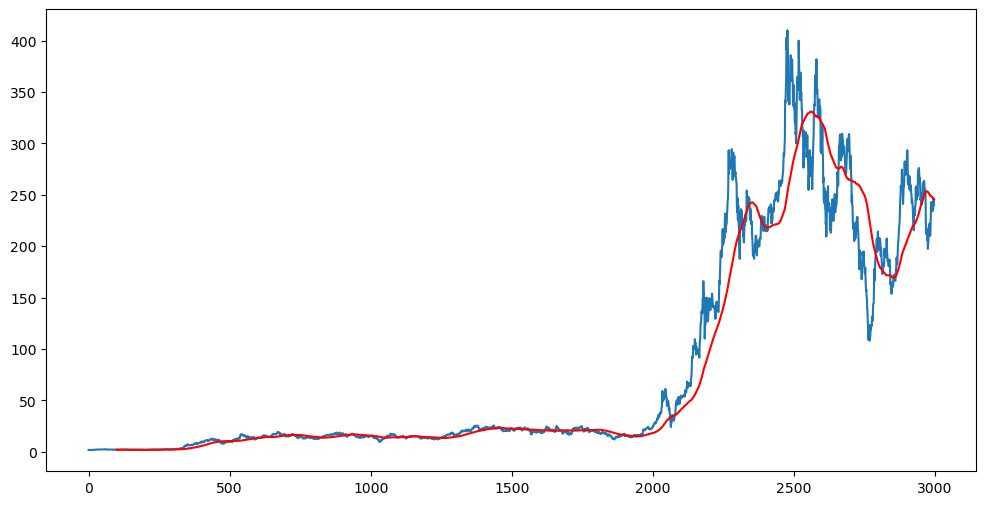

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2993    223.11295
2994    223.25675
2995    223.50590
2996    223.75340
2997    223.90755
Name: Close, Length: 2998, dtype: float64

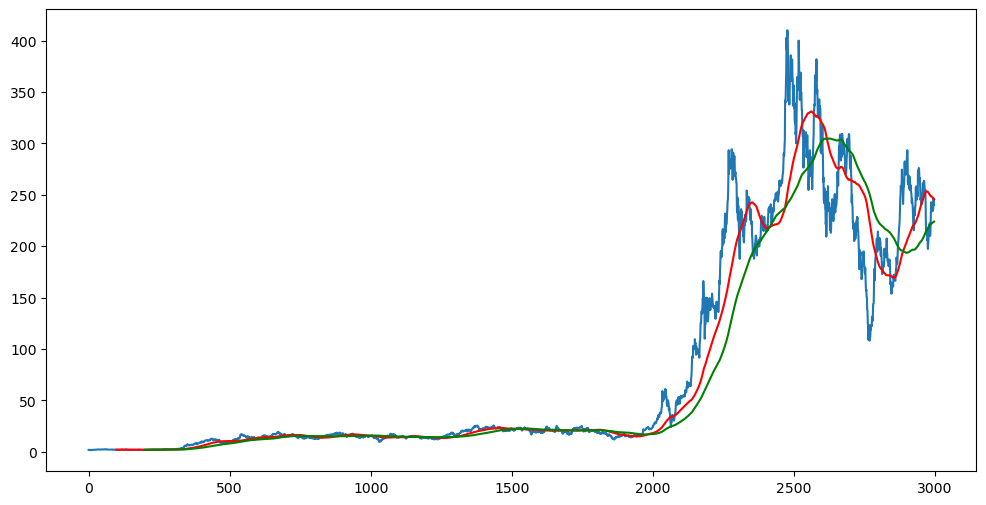

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(2998, 5)

In [15]:
# Splitting Data into Training and Testing

# first 70% data is used for training
# last 30% data is used for testing
data_train = pd.DataFrame(df["Close"][0:int(len(df)*.70)])
data_test = pd.DataFrame(df["Close"][int(len(df)*.70):int(len(df))])

print(data_train.shape)
print(data_test.shape)

(2098, 1)
(900, 1)


In [16]:
data_train.head()

,Close
0,1.872000
1,1.847333
2,1.808000
3,1.794000
4,1.816667


In [17]:
data_test.head()

,Close
2098,52.172001
2099,52.002666
2100,54.627998
2101,54.085999
2102,53.960667


In [18]:
# Scaling data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.00591306],
       [0.00549948],
       [0.00483999],
       ...,
       [0.75844763],
       [0.82536915],
       [0.83321601]])

In [20]:
x_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [21]:
# Machine Learning Model

In [22]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [25]:
x_train.shape

(1998, 100, 1)

In [26]:
model = Sequential()
model.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation="relu", return_sequences=False))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [28]:
#model.compile(optimizer="adam", loss="mean_squared_error")
#model.fit(x_train, y_train, epochs=50)

In [29]:
#model.save('keras_model.h5')

In [30]:
data_test.head()

,Close
2098,52.172001
2099,52.002666
2100,54.627998
2101,54.085999
2102,53.960667


In [31]:
last_100_days = data_train.tail(100)

In [32]:
final_df = pd.concat([last_100_days, data_test], ignore_index=True)

In [33]:
final_df.head()

,Close
0,23.513332
1,23.978666
2,23.892668
3,25.433332
4,25.266001


In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00000000e+00],
       [1.20410379e-03],
       [9.81572927e-04],
       [4.96821567e-03],
       [4.53522612e-03],
       [6.97792776e-03],
       [8.85653873e-03],
       [9.12392323e-03],
       [1.14752001e-02],
       [1.25154213e-02],
       [1.34969893e-02],
       [1.34003822e-02],
       [1.06954685e-02],
       [1.13216672e-02],
       [1.33796828e-02],
       [1.55791542e-02],
       [1.70506425e-02],
       [2.00729716e-02],
       [2.40544469e-02],
       [2.21913630e-02],
       [2.16410670e-02],
       [2.96988873e-02],
       [3.19518346e-02],
       [2.86017403e-02],
       [2.77374788e-02],
       [2.72216818e-02],
       [3.35527065e-02],
       [3.74099804e-02],
       [3.78653968e-02],
       [3.65922901e-02],
       [3.54192354e-02],
       [3.69510994e-02],
       [3.93817338e-02],
       [4.97011385e-02],
       [5.13848079e-02],
       [7.37124494e-02],
       [9.21810993e-02],
       [6.58978593e-02],
       [6.83578203e-02],
       [6.82042874e-02],


In [35]:
input_data.shape

(1000, 1)

In [36]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [37]:
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(900, 100, 1)
(900,)


In [38]:
# Making Predictions

y_predict = model.predict(x_test)

# If using MinMaxScaler, inverse transform predictions
#predictions = scaler.inverse_transform(predictions)
y_predict.shape

29/29 [==============================] - 2s 41ms/step


(900, 1)

In [39]:
y_test

array([0.07415752, 0.07371935, 0.08051269, 0.0791102 , 0.07878589,
       0.07560313, 0.07773705, 0.07701942, 0.07951388, 0.07854438,
       0.07984681, 0.0819238 , 0.08007453, 0.08041781, 0.08065242,
       0.07816487, 0.08320036, 0.09408558, 0.09123231, 0.09147382,
       0.08826863, 0.09193959, 0.10302492, 0.10142923, 0.11598542,
       0.1069788 , 0.10049941, 0.11009427, 0.10858139, 0.1102478 ,
       0.11234722, 0.11181936, 0.11068426, 0.11197115, 0.10491042,
       0.10924555, 0.10471894, 0.11327704, 0.12543192, 0.13230116,
       0.1476595 , 0.17576443, 0.17891786, 0.17478114, 0.17968035,
       0.2056203 , 0.19741067, 0.20081597, 0.2058549 , 0.19802823,
       0.19806274, 0.2225864 , 0.20971045, 0.21384545, 0.2001725 ,
       0.18359972, 0.20474913, 0.1938622 , 0.1977643 , 0.19575977,
       0.18597342, 0.19533022, 0.19567523, 0.19533368, 0.19612032,
       0.18975996, 0.18387056, 0.17624917, 0.20736434, 0.21879124,
       0.22391644, 0.25581825, 0.26469376, 0.2632171 , 0.28448

In [40]:
y_predict

array([[0.00063338],
       [0.00065161],
       [0.00066832],
       [0.00068399],
       [0.00069895],
       [0.00071331],
       [0.00072692],
       [0.0007397 ],
       [0.00075155],
       [0.00076254],
       [0.0007727 ],
       [0.00078212],
       [0.00079097],
       [0.0007993 ],
       [0.00080712],
       [0.0008144 ],
       [0.00082101],
       [0.0008271 ],
       [0.00083346],
       [0.00084056],
       [0.00084857],
       [0.00085727],
       [0.0008665 ],
       [0.00087672],
       [0.00088818],
       [0.00090168],
       [0.00091716],
       [0.00093386],
       [0.00095135],
       [0.00096933],
       [0.00098753],
       [0.00100579],
       [0.00102387],
       [0.00104148],
       [0.00105842],
       [0.00107412],
       [0.00108836],
       [0.00110084],
       [0.00111185],
       [0.00112245],
       [0.00113389],
       [0.0011478 ],
       [0.00116671],
       [0.00119215],
       [0.00122385],
       [0.0012614 ],
       [0.0013051 ],
       [0.001

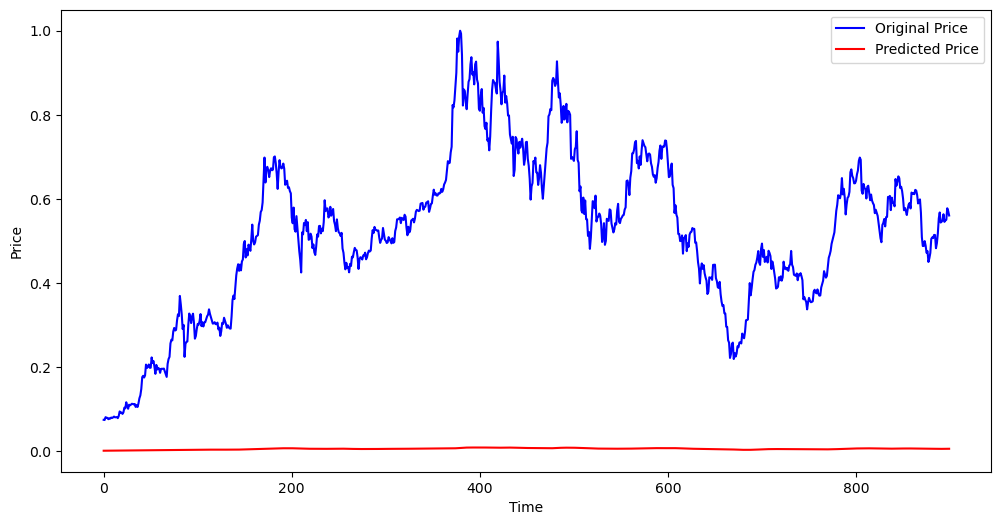

In [41]:
plt.figure(figsize=(12,6))

plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predict, 'r', label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

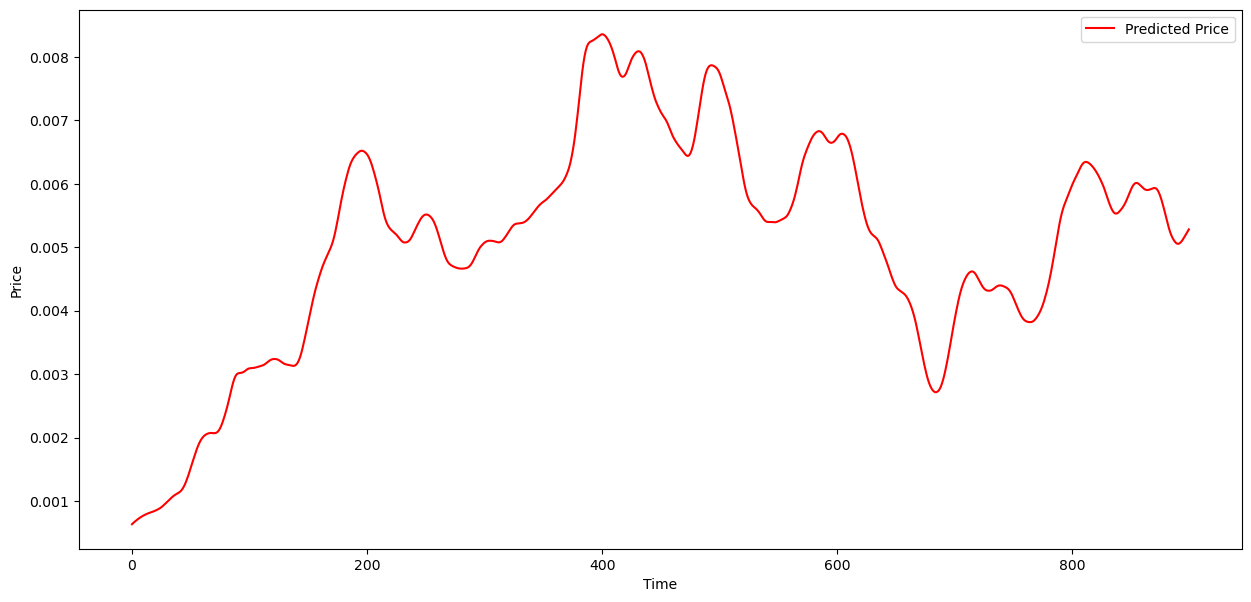

In [42]:
plt.figure(figsize=(15,7))

#plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predict, 'r', label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()